<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Watermark" data-toc-modified-id="Watermark-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Watermark</a></span></li><li><span><a href="#Imports-and-Setups" data-toc-modified-id="Imports-and-Setups-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports and Setups</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Autoimport-my-code" data-toc-modified-id="Autoimport-my-code-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Autoimport my code</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Plotting</a></span></li></ul></li></ul></li><li><span><a href="#Reminders" data-toc-modified-id="Reminders-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reminders</a></span></li><li><span><a href="#Redoing-XKA-plots" data-toc-modified-id="Redoing-XKA-plots-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Redoing XKA plots</a></span></li><li><span><a href="#Basic-characterization" data-toc-modified-id="Basic-characterization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Basic characterization</a></span></li><li><span><a href="#KCNQ1OT1-expression-vs-unspliced-pc" data-toc-modified-id="KCNQ1OT1-expression-vs-unspliced-pc-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>KCNQ1OT1 expression vs unspliced pc</a></span></li><li><span><a href="#Expressed-protein-profiles" data-toc-modified-id="Expressed-protein-profiles-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Expressed protein profiles</a></span><ul class="toc-item"><li><span><a href="#Characterization" data-toc-modified-id="Characterization-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Characterization</a></span></li><li><span><a href="#Normalization" data-toc-modified-id="Normalization-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Normalization</a></span></li><li><span><a href="#Correlation-with-kmer-profiles" data-toc-modified-id="Correlation-with-kmer-profiles-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Correlation with kmer profiles</a></span></li><li><span><a href="#Xist-community" data-toc-modified-id="Xist-community-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Xist community</a></span></li><li><span><a href="#Redraw" data-toc-modified-id="Redraw-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Redraw</a></span></li></ul></li></ul></div>

# Watermark

In [2]:
%load_ext watermark
%watermark -a 'Jessime Kirk' -nmv --packages numpy,scipy,pandas,sklearn,matplotlib,seaborn,networkx,notebook,jupyter_contrib_nbextensions

Jessime Kirk Mon Mar 04 2019 

CPython 3.6.8
IPython 7.3.0

numpy 1.16.2
scipy 1.2.1
pandas 0.24.1
sklearn 0.20.2
matplotlib 3.0.2
seaborn 0.9.0
networkx 2.2
notebook 5.7.4
jupyter_contrib_nbextensions 0.5.0

compiler   : GCC 7.3.0
system     : Linux
release    : 4.15.0-45-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


# Imports and Setups

In [107]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from tqdm import tqdm, trange, tqdm_notebook, tnrange

from scipy.stats import chisquare
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu
from scipy.stats import percentileofscore

### Autoimport my code

In [3]:
pwd

'/home/jessime/Code/kmers3/Notebooks'

In [4]:
cd ..

/home/jessime/Code/kmers3


In [5]:
%load_ext autoreload

In [6]:
%autoreload 2

### Plotting

In [7]:
%matplotlib inline
plt.style.use("seaborn-whitegrid")
plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.labelsize'] = 26
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
#plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['font.sans-serif'] = 'Helvetica'
colors = [i['color'] for i in plt.rcParams['axes.prop_cycle']]

# Reminders

* All images should be saved as pdfs. They can be converted from pdf to png as necessary, but you can’t convert a png to pdf.
* When finished with a notebook, archive it with `jupyter nbconvert --to pdf nb.ipynb`

# Redoing XKA plots

The plots that I have from March are good, but I need some extra data.

First, what's the most similar spliced lncRNA to Xist?

In [7]:
%aimport fasta_reader

In [8]:
%aimport kmer_counts

In [9]:
%aimport pearson

In [10]:
rna_counts = ['/home/jessime/Research/mrna_lncrna/M14_6mers_lnc_unspliced.npy',
'/home/jessime/Research/mrna_lncrna/M14_6mers_lnc_spliced201.npy',
'/home/jessime/Research/mrna_lncrna/M14_6mers_pc_unspliced.npy',
'/home/jessime/Research/mrna_lncrna/M14_6mers_pc_spliced201.npy']

rna_types = ['lncs_unspliced', 'lncs_spliced', 'pc_unspliced', 'pc_spliced']

counts_ls = [np.load(path) for path in rna_counts]

In [13]:
counts = np.vstack(counts_ls)
print(counts.shape)

(60829, 4096)


Even though I don't have a complete record of how it was made, I double checked, and all the headers are correct for `M14_combo.fa`. And I'm pulling the arrays from page 52 in March.

In [11]:
combo = '/home/jessime/Research/mrna_lncrna/M14_combo.fa'
combo_counter = kmer_counts.BasicCounter(combo, log2=False)
combo_counter.get_counts()

In [34]:
mean_all = np.load('/home/jessime/Research/fa_arrays/M14_combo_6mers_mean.npy')
std_all = np.load('/home/jessime/Research/fa_arrays/M14_combo_6mers_mean.npy')

In [46]:
np.allclose(combo_counter.mean, mean_all, rtol=.00001, atol=.000001)

True

Well that's nice, I guess, but still leaves us with questions. 

In [12]:
xka = '/home/jessime/Research/indv_seqs/M5_XKA.fa'
names = ['Xist', 'Kcnq1ot1', 'Air-UN']

xka_counter = kmer_counts.BasicCounter(xka, mean=combo_counter.mean, std=combo_counter.std, log2=False)
xka_counter.get_counts()

In [13]:
fasta_path = '/home/jessime/Research/mrna_lncrna/M14_lnc_spliced201.fa'
reader = fasta_reader.Reader(fasta_path)
headers = reader.get_headers()

In [14]:
sim = pearson.pearson(xka_counter.counts, counts_ls[1])
df = pd.DataFrame(data=sim[0], index=headers, columns=['Xist_r-val'])
df.sort_values('Xist_r-val', ascending=False).head()

Xist_r-val
>ENSMUST00000127786.2 gene=Xist       1.000000
>ENSMUST00000208630.1 gene=Gm45159    0.298463
>ENSMUST00000044500.5 gene=Gm4117     0.266516
>ENSMUST00000181486.1 gene=Gm26624    0.258099
>ENSMUST00000201757.1 gene=Gm36669    0.217773

Point: `>ENSMUST00000208630.1 gene=Gm45159	0.298463`

In [18]:
df['Xist_r-val'].quantile(.99)

0.14031496294225115

In [20]:
print(df['Xist_r-val'].mean() + 2 * df['Xist_r-val'].std())
print(df['Xist_r-val'].mean() + 3 * df['Xist_r-val'].std())

0.10306582739386627
0.15668588963965768


In [21]:
(df['Xist_r-val'] > 0.15668).sum()

49

Now we have a baseline.

In [23]:
std3 = df['Xist_r-val'].mean() + 3 * df['Xist_r-val'].std()
std3

0.15668588963965768

Let's look at unspliced lncRNAs now.

In [25]:
fasta_path = '/home/jessime/Research/mrna_lncrna/M14_lnc_unspliced.fa'
reader = fasta_reader.Reader(fasta_path)
headers = reader.get_headers()

sim = pearson.pearson(xka_counter.counts, counts_ls[0])
df = pd.DataFrame(data=sim[0], index=headers, columns=['Xist_r-val'])
df.sort_values('Xist_r-val', ascending=False).head()

Xist_r-val
>UNSPLICED30126 gene=Xist             0.955247
>UNSPLICED19274 gene=4933427E13Rik    0.370716
>UNSPLICED21215 gene=AC124134.1       0.368058
>UNSPLICED8546 gene=4930467D21Rik     0.365803
>UNSPLICED5603 gene=Gm43603           0.364971

In [26]:
print(df['Xist_r-val'].mean() + 3 * df['Xist_r-val'].std())
(df['Xist_r-val'] > 0.15668).sum()

0.37902825827478065


1953

In [31]:
fasta_path = '/home/jessime/Research/mrna_lncrna/M14_pc_unspliced.fa'
reader = fasta_reader.Reader(fasta_path)
headers = reader.get_headers()

sim = pearson.pearson(xka_counter.counts, counts_ls[2])
df = pd.DataFrame(data=sim[0], index=headers, columns=['Xist_r-val'])
df.sort_values('Xist_r-val', ascending=False).head()

Xist_r-val
>UNSPLICED4676 gene=Plch1      0.391156
>UNSPLICED26231 gene=Lpp       0.388893
>UNSPLICED24935 gene=Diaph3    0.387213
>UNSPLICED9926 gene=Tpk1       0.386487
>UNSPLICED29271 gene=Sorcs1    0.385560

In [32]:
print(df['Xist_r-val'].mean() + 3 * df['Xist_r-val'].std())
print((df['Xist_r-val'] > 0.15668).sum())
print((df['Xist_r-val'] > 0.298463).sum())

0.5359923767958559
7351
1898


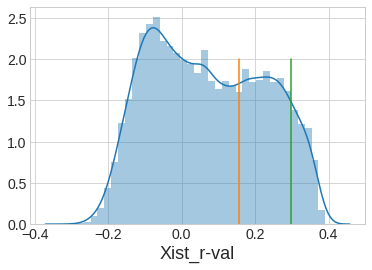

In [35]:
sns.distplot(df['Xist_r-val'])
plt.plot((0.15668, 0.15668), (0, 2))
plt.plot((0.298463, 0.298463), (0, 2))

# Basic characterization

Before I present the localizaton, I want to give some simple stats about the communities.

In [7]:
groups = '/home/jessime/Research/mrna_lncrna/v26_extend_groups2.csv'
groups = pd.read_csv(groups, index_col=0)
groups = groups.iloc[:-9] #strip the doped transcripts
groups.head()

group  lncRNA  spliced    type
MIR1302-2HG-UN        5    True    False  lnc_un
FAM138A-UN            5    True    False  lnc_un
RP11-34P13.7-UN       7    True    False  lnc_un
RP11-34P13.8-UN       5    True    False  lnc_un
RP11-34P13.14-UN      5    True    False  lnc_un

In [31]:
crosstabbed = pd.crosstab(groups['group'], groups['type'])
crosstabbed['total'] = crosstabbed.sum(axis=1)
crosstabbed.loc['total'] = crosstabbed.sum(axis=0)
crosstabbed

type   lnc_sp  lnc_un  pc_sp  pc_un  total
group                                     
0        1259     934   5622   1135   8950
1        1443    1308   3076   2248   8075
2        2697    1354   2881    349   7281
3        1147    1767    585   3287   6786
4         738    2256   1940   1441   6375
5        1753    1537   1031   1845   6166
6         490    1636    373   3653   6152
7        1052    2497    816   1506   5871
8         334     899   1118   2762   5113
9         903    1311    394   1556   4164
10        249     100    362     35    746
total   12065   15599  18198  19817  65679

In [33]:
738/6375

0.11576470588235294

In [34]:
12065/65679

0.18369646310083892

In [36]:
f_obs = [738, 12065-738]
f_exp = [int(0.183696 * 12065), int((1 - 0.183696) * 12065)]
chisquare(f_obs, f_exp)

Power_divergenceResult(statistic=1207.8983073401625, pvalue=1.1716051759627454e-264)

Does the XIST community have more protein coding genes than expected?

In [1]:
(1940+1441)/6375

0.5303529411764706

In [2]:
(18198+19817)/65679

0.5787999208270528

And let's get the numbers for unspliced lncRNAs too

In [4]:
2256/6375

0.3538823529411765

In [3]:
15599/65679

0.2375036160721083

In [32]:
outfile = '/home/jessime/Dropbox/Documents/dissertation/v26_group_type.csv'
crosstabbed.to_csv(outfile)

In [15]:
group_by_group = groups.groupby('group').count()
group_by_group = group_by_group[['lncRNA']]
group_by_group.columns = ['size']

group_by_group_sum = groups.groupby('group').sum()
group_by_group_sum = group_by_group_sum.astype(int)
group_by_group = group_by_group.join(group_by_group_sum)
group_by_group['mRNA'] = group_by_group['size'] - group_by_group['lncRNA']
group_by_group['unspliced'] = group_by_group['size'] - group_by_group['spliced']

group_by_group

size  lncRNA  spliced  mRNA  unspliced
group                                        
0      8950    2193     6881  6757       2069
1      8075    2751     4519  5324       3556
2      7281    4051     5578  3230       1703
3      6786    2914     1732  3872       5054
4      6375    2994     2678  3381       3697
5      6166    3290     2784  2876       3382
6      6152    2126      863  4026       5289
7      5871    3549     1868  2322       4003
8      5113    1233     1452  3880       3661
9      4164    2214     1297  1950       2867
10      746     349      611   397        135

In [18]:
%aimport fasta

In [19]:
infasta = '/home/jessime/Research/mrna_lncrna/v26_combo.fa'
extracter = fasta.Extracter(infasta)

In [20]:
groups['GC_content'] = extracter.gc_content()
groups['length'] = extracter.get_lengths()

In [22]:
group_by_group_median = groups.groupby('group').median()
group_by_group_median['length'] = group_by_group_median['length'].astype(int)
group_by_group_median

lncRNA  spliced  GC_content  length
group                                     
0       False     True    0.567074    1964
1       False     True    0.581007    2681
2        True     True    0.423716    1717
3       False    False    0.502155    7890
4       False    False    0.371698    5391
5        True    False    0.511644    2442
6       False    False    0.428993   24610
7        True    False    0.407371    7063
8       False    False    0.393820   16520
9        True    False    0.456541    4069
10      False     True    0.454841    2186

In [23]:
group_by_group = group_by_group.join(group_by_group_median[['GC_content', 'length']])
group_by_group

size  lncRNA  spliced  mRNA  unspliced  GC_content  length
group                                                            
0      8950    2193     6881  6757       2069    0.567074    1964
1      8075    2751     4519  5324       3556    0.581007    2681
2      7281    4051     5578  3230       1703    0.423716    1717
3      6786    2914     1732  3872       5054    0.502155    7890
4      6375    2994     2678  3381       3697    0.371698    5391
5      6166    3290     2784  2876       3382    0.511644    2442
6      6152    2126      863  4026       5289    0.428993   24610
7      5871    3549     1868  2322       4003    0.407371    7063
8      5113    1233     1452  3880       3661    0.393820   16520
9      4164    2214     1297  1950       2867    0.456541    4069
10      746     349      611   397        135    0.454841    2186

In [25]:
outfile = '/home/jessime/Dropbox/Documents/dissertation/v26_basic_group_stats.tab'
group_by_group.to_csv(outfile, sep='\t', float_format='%.3f')

# KCNQ1OT1 expression vs unspliced pc

I want to know how many unspliced protein coding genes there are that are more highly expressed than KCNQ1OT1.

In [8]:
folder = '/home/jessime/Research/mrna_lncrna/wgEncode/'
infile = folder + 'megan_full_unspliced_airn.tab'
unspliced = pd.read_csv(infile, index_col=0, sep='\t')
print(unspliced.shape)
unspliced.head()

(33535, 9)


transcript_id   Chr    Start      End Strand  Length  \
0  ENSMUST00000193812.1  chr1  3073253  3074322      +    1070   
2            UNSPLICED0  chr1  3205901  3671498      -  459508   
7  ENSMUST00000195335.1  chr1  3365731  3368549      -    2819   
8  ENSMUST00000192336.1  chr1  3375556  3377788      -    2233   
9  ENSMUST00000194099.1  chr1  3464977  3467285      -    2309   

   Aligned.out.sam      Norm    transcript_name  
0                0  0.000000  4933401J01Rik-201  
2              916  0.044056            Xkr4-un  
7                0  0.000000        Gm37180-201  
8                0  0.000000        Gm37363-201  
9                0  0.000000        Gm37686-201

In [11]:
lnc_unspliced_transcript_ids = '/home/jessime/Research/mrna_lncrna/M14_lnc_unspliced_transcript_ids.txt'
with open(lnc_unspliced_transcript_ids) as lnc_unspliced_transcript_ids:
    lnc_unspliced_transcript_ids = set(line.strip() for line in lnc_unspliced_transcript_ids)
    
pc_unspliced = unspliced[~unspliced['transcript_id'].isin(lnc_unspliced_transcript_ids)]
kcnq1 = unspliced[unspliced['transcript_name'] == ('Kcnq1ot1-201')].iloc[0]['Norm']
print(kcnq1)
len(pc_unspliced[pc_unspliced['Norm'] > kcnq1])

5.664557903622337


886

So there are 886 unspliced protein coding genes more highly expressed in TSCs than Kcnq1ot1.

What about in human?

In [14]:
lnc_unspliced_transcript_ids = '/home/jessime/Research/mrna_lncrna/v26_lnc_unspliced_transcript_ids.txt'
with open(lnc_unspliced_transcript_ids) as lnc_unspliced_transcript_ids:
    lnc_unspliced_transcript_ids = set(line.strip() for line in lnc_unspliced_transcript_ids)
    
print('HepG2')
infile = folder + 'hepG2_cell_npa_FC_unspliced.tab'
unspliced = pd.read_csv(infile, index_col=0)
print(unspliced.shape)
    
pc_unspliced = unspliced[~unspliced['transcript_id'].isin(lnc_unspliced_transcript_ids)]
kcnq1 = unspliced[unspliced['transcript_name'] == ('KCNQ1OT1-001')].iloc[0]['Norm']
print(kcnq1)
print(len(pc_unspliced[pc_unspliced['Norm'] > kcnq1]))
print('-'*10)

print('K562')
infile = folder + 'k562_cell_npa_FC_unspliced.tab'
unspliced = pd.read_csv(infile, index_col=0)
print(unspliced.shape)
    
pc_unspliced = unspliced[~unspliced['transcript_id'].isin(lnc_unspliced_transcript_ids)]
kcnq1 = unspliced[unspliced['transcript_name'] == ('KCNQ1OT1-001')].iloc[0]['Norm']
print(kcnq1)
print(len(pc_unspliced[pc_unspliced['Norm'] > kcnq1]))

HepG2
(35416, 9)
12.92641537755468
187
----------
K562
(35416, 9)
5.145635664412588
559


# Expressed protein profiles

I need to break up the protein profiles between cell types, so I can get proteins that are expressed in each cell.

In [11]:
df = '/home/jessime/Research/proteins/new_eCLIP/transcript_coverage.tab'
df = pd.read_csv(df, sep='\t', index_col=0)
print(df.shape)
df.head()

(65679, 224)


transcript_name  PUM2_K562  GRWD1_HepG2  TROVE2_K562  \
transcript_id                                                             
UNSPLICED2          MIR1302-2HG-un        0.0          0.0          0.0   
ENST00000473358.1  MIR1302-2HG-001        0.0          0.0          0.0   
UNSPLICED3              FAM138A-un        0.0          0.0          0.0   
ENST00000417324.1      FAM138A-001        0.0          0.0          0.0   
ENST00000335137.3        OR4F5-001        0.0          0.0          0.0   

                   SSB_HepG2  LARP7_HepG2  ILF3_HepG2  DKC1_HepG2  \
transcript_id                                                       
UNSPLICED2               0.0          0.0         0.0         0.0   
ENST00000473358.1        0.0          0.0         0.0         0.0   
UNSPLICED3               0.0          0.0         0.0         0.0   
ENST00000417324.1        0.0          0.0         0.0         0.0   
ENST00000335137.3        0.0          0.0         0.0         0.0   

                   HNRNPUL1_K562  BCCIP_HepG2  ...  QKI_K562  ZC3H11A_HepG2  \
transcript_id                                  ...                            
UNSPLICED2                   0.0          0.0  ...       0.0            0.0   
ENST00000473358.1            0.0          0.0  ...       0.0            0.0   
UNSPLICED3                   0.0          0.0  ...       0.0            0.0   
ENST00000417324.1            0.0          0.0  ...       0.0            0.0   
ENST00000335137.3            0.0          0.0  ...       0.0            0.0   

                   SND1_K562  TIAL1_HepG2  SUPV3L1_HepG2  XRN2_HepG2  \
transcript_id                                                          
UNSPLICED2               0.0          0.0            0.0         0.0   
ENST00000473358.1        0.0          0.0            0.0         0.0   
UNSPLICED3               0.0          0.0            0.0         0.0   
ENST00000417324.1        0.0          0.0            0.0         0.0   
ENST00000335137.3        0.0          0.0            0.0         0.0   

                   AKAP8L_K562  BUD13_HepG2  SLTM_K562  UTP18_HepG2  
transcript_id                                                        
UNSPLICED2                 0.0          0.0        0.0          0.0  
ENST00000473358.1          0.0          0.0        0.0          0.0  
UNSPLICED3                 0.0          0.0        0.0          0.0  
ENST00000417324.1          0.0          0.0        0.0          0.0  
ENST00000335137.3          0.0          0.0        0.0          0.0  

[5 rows x 224 columns]

In [27]:
hepG2_columns = ['transcript_name'] + [c for c in df.columns if 'HepG2' in c]
df_hepG2 = df[hepG2_columns].copy()

In [21]:
k562_columns = ['transcript_name'] + [c for c in df.columns if 'K562' in c]
df_k562 = df[k562_columns].copy()

Now lets get expression levels.

In [16]:
folder = '/home/jessime/Research/mrna_lncrna/wgEncode/'
infile = folder + 'hepG2_cell_npa_FC_unspliced.tab'
unspliced = pd.read_csv(infile, index_col=0)

In [18]:
infile = folder + 'hepG2_cell_npa_FC_spliced.tab'
spliced = pd.read_csv(infile, index_col=0)

In [28]:
hepG2_expression = pd.concat((unspliced, spliced))
hepG2_expression.set_index('transcript_id', inplace=True)
print(hepG2_expression.shape)
hepG2_expression.head()

(65679, 8)


Chr  Start     End Strand  Length  Aligned.out.sam  \
transcript_id                                                            
UNSPLICED2         chr1  29554   31109      +     538              0.0   
UNSPLICED3         chr1  34554   36081      -     312              0.0   
ENST00000335137.3  chr1  69091   70008      +     918              0.0   
UNSPLICED4         chr1  89295  133723      -   40710             53.0   
UNSPLICED5         chr1  89551   91105      -     238              0.0   

                       Norm  transcript_name  
transcript_id                                 
UNSPLICED2         0.000000   MIR1302-2HG-un  
UNSPLICED3         0.000000       FAM138A-un  
ENST00000335137.3  0.000000        OR4F5-001  
UNSPLICED4         0.021941  RP11-34P13.7-un  
UNSPLICED5         0.000000  RP11-34P13.8-un

In [29]:
hepG2_expressed = hepG2_expression[hepG2_expression['Norm'] > .1]
hepG2_expressed_profiles = df_hepG2.loc[hepG2_expressed.index]
print(hepG2_expressed_profiles.shape)
hepG2_expressed_profiles.head()

(33961, 104)


transcript_name  GRWD1_HepG2  SSB_HepG2  LARP7_HepG2  \
transcript_id                                                          
UNSPLICED11       AP006222.2-un      0.00366    0.00000          0.0   
UNSPLICED17     RP5-857K21.4-un      0.00529    0.00031          0.0   
UNSPLICED21    RP11-206L10.4-un      0.00000    0.00000          0.0   
UNSPLICED22    RP11-206L10.9-un      0.01726    0.00125          0.0   
UNSPLICED24           FAM87B-un      0.00000    0.00000          0.0   

               ILF3_HepG2  DKC1_HepG2  BCCIP_HepG2  NOLC1_HepG2  QKI_HepG2  \
transcript_id                                                                
UNSPLICED11       0.00161     0.00000      0.00000      0.00000    0.00000   
UNSPLICED17       0.00262     0.00025      0.00329      0.00033    0.00182   
UNSPLICED21       0.00000     0.00000      0.00000      0.00000    0.00000   
UNSPLICED22       0.01393     0.00173      0.00000      0.00000    0.00131   
UNSPLICED24       0.00000     0.00000      0.00000      0.00000    0.00000   

               HNRNPA1_HepG2  ...  SMNDC1_HepG2  POLR2G_HepG2  XPO5_HepG2  \
transcript_id                 ...                                           
UNSPLICED11          0.00520  ...       0.00000       0.00000     0.00000   
UNSPLICED17          0.00311  ...       0.00021       0.00151     0.00089   
UNSPLICED21          0.00000  ...       0.00000       0.00000     0.00000   
UNSPLICED22          0.01297  ...       0.00000       0.00000     0.00000   
UNSPLICED24          0.00000  ...       0.00000       0.00000     0.00000   

               FKBP4_HepG2  ZC3H11A_HepG2  TIAL1_HepG2  SUPV3L1_HepG2  \
transcript_id                                                           
UNSPLICED11        0.00000        0.00091      0.00000        0.00000   
UNSPLICED17        0.00013        0.00531      0.00061        0.00148   
UNSPLICED21        0.00000        0.00000      0.00000        0.00000   
UNSPLICED22        0.00000        0.00096      0.00115        0.00000   
UNSPLICED24        0.00000        0.00000      0.00000        0.00000   

               XRN2_HepG2  BUD13_HepG2  UTP18_HepG2  
transcript_id                                        
UNSPLICED11       0.00000      0.00000      0.00000  
UNSPLICED17       0.00258      0.00227      0.00021  
UNSPLICED21       0.00000      0.00000      0.00000  
UNSPLICED22       0.00566      0.00000      0.00000  
UNSPLICED24       0.00000      0.00000      0.00000  

[5 rows x 104 columns]

In [31]:
folder = '/home/jessime/Research/mrna_lncrna/wgEncode/'
infile = folder + 'k562_cell_npa_FC_unspliced.tab'
unspliced = pd.read_csv(infile, index_col=0)
infile = folder + 'k562_cell_npa_FC_spliced.tab'
spliced = pd.read_csv(infile, index_col=0)

k562_expression = pd.concat((unspliced, spliced))
k562_expression.set_index('transcript_id', inplace=True)
k562_expressed = k562_expression[k562_expression['Norm'] > .1]
k562_expressed_profiles = df_k562.loc[k562_expressed.index]
print(k562_expressed_profiles.shape)
k562_expressed_profiles.head()

(28991, 121)


transcript_name  PUM2_K562  TROVE2_K562  HNRNPUL1_K562  \
transcript_id                                                                
ENST00000335137.3         OR4F5-001    0.00000      0.00000        0.00000   
UNSPLICED4          RP11-34P13.7-un    0.00072      0.00221        0.00187   
UNSPLICED6         RP11-34P13.14-un    0.00000      0.00000        0.00000   
UNSPLICED11           AP006222.2-un    0.00101      0.00000        0.00000   
UNSPLICED17         RP5-857K21.4-un    0.00071      0.00151        0.00124   

                   PHF6_K562  TRA2A_K562  AATF_K562  WRN_K562  TAF15_K562  \
transcript_id                                                               
ENST00000335137.3    0.00000     0.00000    0.00000   0.00000     0.00000   
UNSPLICED4           0.00070     0.00000    0.00000   0.00000     0.00326   
UNSPLICED6           0.00000     0.00000    0.00000   0.00000     0.00000   
UNSPLICED11          0.00000     0.00000    0.00000   0.00000     0.00739   
UNSPLICED17          0.00405     0.00057    0.00046   0.00069     0.00217   

                   HNRNPK_K562  ...  EWSR1_K562  MTPAP_K562  HNRNPL_K562  \
transcript_id                   ...                                        
ENST00000335137.3      0.00000  ...     0.00000     0.00000      0.00000   
UNSPLICED4             0.00063  ...     0.00000     0.00234      0.01377   
UNSPLICED6             0.00000  ...     0.00000     0.00000      0.00000   
UNSPLICED11            0.00000  ...     0.00081     0.00235      0.01178   
UNSPLICED17            0.00373  ...     0.00049     0.00371      0.00739   

                   AQR_K562  EIF4G2_K562  UTP3_K562  QKI_K562  SND1_K562  \
transcript_id                                                              
ENST00000335137.3   0.00000      0.00000    0.00000   0.00000    0.00000   
UNSPLICED4          0.00000      0.00081    0.00000   0.00000    0.00187   
UNSPLICED6          0.00000      0.00000    0.00000   0.00000    0.00000   
UNSPLICED11         0.00091      0.00000    0.00000   0.00000    0.00373   
UNSPLICED17         0.00528      0.00054    0.00112   0.00097    0.00309   

                   AKAP8L_K562  SLTM_K562  
transcript_id                              
ENST00000335137.3      0.00000    0.00000  
UNSPLICED4             0.00095    0.00250  
UNSPLICED6             0.00000    0.00000  
UNSPLICED11            0.00000    0.00323  
UNSPLICED17            0.00246    0.00212  

[5 rows x 121 columns]

Let's save these raw ratios before moving on.

In [33]:
outfile = '/home/jessime/Research/proteins/new_eCLIP/hepG2_expressed_coverage.tab'
hepG2_expressed_profiles.to_csv(outfile, sep='\t', float_format='%.5f')

In [34]:
outfile = '/home/jessime/Research/proteins/new_eCLIP/k562_expressed_coverage.tab'
k562_expressed_profiles.to_csv(outfile, sep='\t', float_format='%.5f')

## Characterization

Even after filtering for "expressed", it looks like most transcripts either bind a lot of RNA binding proteins, or almost none. Let's look at the distributions.

In [7]:
infile = '/home/jessime/Research/proteins/new_eCLIP/hepG2_expressed_coverage.tab'
hepG2_expressed_profiles = pd.read_csv(infile, sep='\t', index_col=0)
infile = '/home/jessime/Research/proteins/new_eCLIP/k562_expressed_coverage.tab'
k562_expressed_profiles = pd.read_csv(infile, sep='\t', index_col=0)

In [8]:
nums_hepG2 = hepG2_expressed_profiles[hepG2_expressed_profiles.columns[1:]].values
nums_k562 = k562_expressed_profiles[k562_expressed_profiles.columns[1:]].values

In [45]:
xist_hepG2 = hepG2_expressed_profiles[hepG2_expressed_profiles['transcript_name'] == 'XIST-001']
xist_hepG2 = xist_hepG2[xist_hepG2.columns[1:]].values[0]
xist_k562 = k562_expressed_profiles[k562_expressed_profiles['transcript_name'] == 'XIST-001']
xist_k562 = xist_k562[xist_k562.columns[1:]].values[0]

In [49]:
print(len(xist_hepG2.nonzero()[0]), 'of', len(xist_hepG2))
print(len(xist_k562.nonzero()[0]), 'of', len(xist_k562))

7 of 103
119 of 120


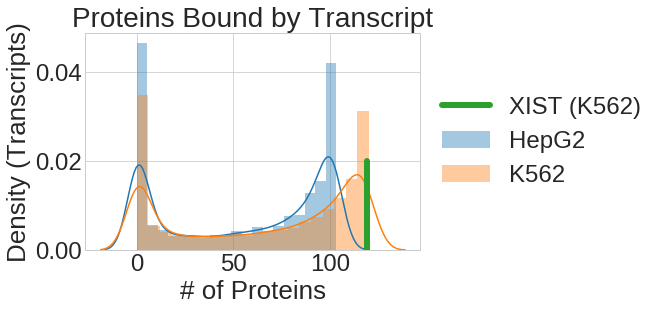

In [58]:
nonzeros_hepG2 = (nums_hepG2 != 0).sum(axis=1)
nonzeros_k562 = (nums_k562 != 0).sum(axis=1)
sns.distplot(nonzeros_hepG2, label='HepG2')
sns.distplot(nonzeros_k562, label='K562')
plt.plot((119, 119), (0, .02), linewidth=6, label='XIST (K562)')
plt.title('Proteins Bound by Transcript')
plt.xlabel('# of Proteins')
plt.ylabel('Density (Transcripts)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
outfile = '/home/jessime/Dropbox/Documents/dissertation/n_proteins_bound.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

Similarly, here's the distribution of non-zero coverage ratios:

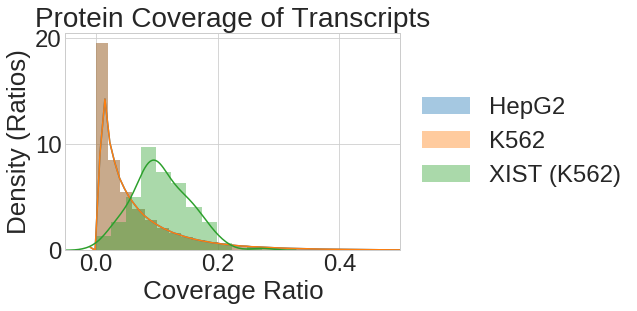

In [57]:
flat_non_zero_hepG2 = nums_hepG2[np.nonzero(nums_hepG2)].ravel()
flat_non_zero_k562 = nums_k562[np.nonzero(nums_k562)].ravel()
sns.distplot(flat_non_zero_hepG2, label='HepG2')
sns.distplot(flat_non_zero_hepG2, label='K562')
sns.distplot(xist_k562, label='XIST (K562)')
plt.title('Protein Coverage of Transcripts')
plt.xlim((-.05, .5))
plt.xlabel('Coverage Ratio')
plt.ylabel('Density (Ratios)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
outfile = '/home/jessime/Dropbox/Documents/dissertation/coverage_ratios.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

In [23]:
np.percentile(flat_non_zero_hepG2, 95)

0.22534

## Normalization

I'm using the same normalization as for kmer profiles.

In [107]:
infile = '/home/jessime/Research/proteins/new_eCLIP/hepG2_expressed_coverage.tab'
hepG2_expressed_profiles = pd.read_csv(infile, sep='\t', index_col=0)
nums_hepG2 = hepG2_expressed_profiles[hepG2_expressed_profiles.columns[1:]].values
nums_hepG2_norm = nums_hepG2.copy()
nums_hepG2_norm -= nums_hepG2_norm.mean(axis=0)
nums_hepG2_norm /= nums_hepG2_norm.std(axis=0)
nums_hepG2_norm += abs(nums_hepG2_norm.min()) + 1
nums_hepG2_norm = np.log2(nums_hepG2_norm)
hepG2_expressed_norm = hepG2_expressed_profiles[['transcript_name']]
hepG2_expressed_norm2 = pd.DataFrame(data=nums_hepG2_norm,
                                     index=hepG2_expressed_profiles.index,
                                     columns=hepG2_expressed_profiles.columns[1:])
hepG2_expressed_norm = pd.concat((hepG2_expressed_norm, hepG2_expressed_norm2), axis=1)
outfile = '/home/jessime/Research/proteins/new_eCLIP/hepG2_expressed_norm.tab'
hepG2_expressed_norm.to_csv(outfile, sep='\t', float_format='%.5f')

In [108]:
infile = '/home/jessime/Research/proteins/new_eCLIP/k562_expressed_coverage.tab'
k562_expressed_profiles = pd.read_csv(infile, sep='\t', index_col=0)
nums_k562 = k562_expressed_profiles[k562_expressed_profiles.columns[1:]].values
nums_k562_norm = nums_k562.copy()
nums_k562_norm -= nums_k562_norm.mean(axis=0)
nums_k562_norm /= nums_k562_norm.std(axis=0)
nums_k562_norm += abs(nums_k562_norm.min()) + 1
nums_k562_norm = np.log2(nums_k562_norm)
k562_expressed_norm = k562_expressed_profiles[['transcript_name']]
k562_expressed_norm2 = pd.DataFrame(data=nums_k562_norm,
                                     index=k562_expressed_profiles.index,
                                     columns=k562_expressed_profiles.columns[1:])
k562_expressed_norm = pd.concat((k562_expressed_norm, k562_expressed_norm2), axis=1)
outfile = '/home/jessime/Research/proteins/new_eCLIP/k562_expressed_norm.tab'
k562_expressed_norm.to_csv(outfile, sep='\t', float_format='%.5f')

In [109]:
hepG2_expressed_norm.drop('transcript_name', axis=1, inplace=True)
k562_expressed_norm.drop('transcript_name', axis=1, inplace=True)

We're only going to get the k562 xist, since it's the cell type that Xist is expressed in.

In [119]:
xist_id = 'ENST00000429829.5'
xist_row = k562_expressed_norm.loc[[xist_id]]

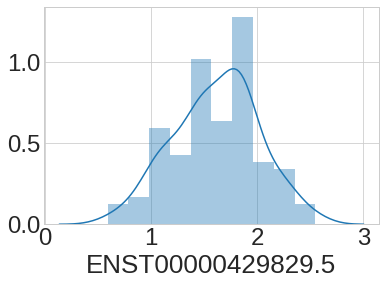

In [113]:
sns.distplot(xist_row)

Nice

In [114]:
%aimport pearson

In [125]:
sim_k562 = pearson.pearson(xist_row, k562_expressed_norm)
sim_k562 = pd.DataFrame(sim_k562, xist_row.index, k562_expressed_norm.index).T
sim_k562['transcript_name'] = k562_expressed_profiles['transcript_name']
sim_k562 = sim_k562[sim_k562.columns[::-1]]
sim_k562.head()

transcript_id       transcript_name  ENST00000429829.5
transcript_id                                         
ENST00000335137.3         OR4F5-001           0.192974
UNSPLICED4          RP11-34P13.7-un           0.369932
UNSPLICED6         RP11-34P13.14-un           0.192974
UNSPLICED11           AP006222.2-un           0.351803
UNSPLICED17         RP5-857K21.4-un           0.319661

In [126]:
sim_k562.tail()

transcript_id     transcript_name  ENST00000429829.5
transcript_id                                       
ENST00000369462.5       BRCC3-001          -0.204282
ENST00000286428.5        VBP1-001           0.124498
ENST00000369449.6       CLIC2-001           0.030292
ENST00000452506.1   TMLHE-AS1-001           0.192974
ENST00000334398.7       TMLHE-001          -0.380425

In [129]:
sim_k562_sorted = sim_k562.rename(columns={'ENST00000429829.5':'XIST-001'})
sim_k562_sorted = sim_k562_sorted.sort_values('XIST-001', ascending=False)
sim_k562_sorted.head(n=11)

transcript_id       transcript_name  XIST-001
transcript_id                                
ENST00000429829.5          XIST-001  1.000000
UNSPLICED34211              XIST-un  0.986809
UNSPLICED34362           MORF4L2-un  0.824115
UNSPLICED646               SRSF4-un  0.822814
UNSPLICED27996     RP11-159D12.5-un  0.806677
UNSPLICED27937            LUC7L3-un  0.798849
UNSPLICED10786         HIST1H2BJ-un  0.781078
UNSPLICED28516              NARF-un  0.779884
UNSPLICED12404             TRA2A-un  0.775404
UNSPLICED15952              IARS-un  0.773968
UNSPLICED13476              CALU-un  0.773928

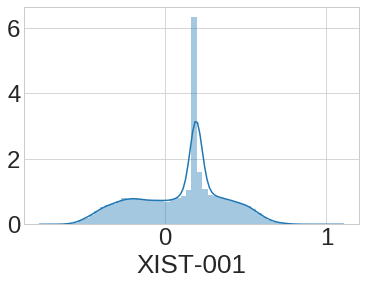

In [130]:
sns.distplot(sim_k562_sorted['XIST-001'])
plt.show()

In [131]:
outfile = '/home/jessime/Dropbox/Documents/dissertation/xist_like_protein_coverage.tab'
sim_k562_sorted.to_csv(outfile, sep='\t', float_format='%.5f')

In [134]:
sim_k562_sorted['XIST-001'].quantile(.99)

0.6299285384260295

In [144]:
sim_k562_99th = sim_k562_sorted[sim_k562_sorted['XIST-001'] > .63 - .0001] #error for dropping Xist
sim_k562_99th = sim_k562_99th[2:]
len(sim_k562_99th)

289

Of the 289 transcripts here, how many of them are unspliced protein coding? How many would we expect? What's the p-value?

In [145]:
pc_unspliced_transcript_ids = '/home/jessime/Research/mrna_lncrna/v26_pc_unspliced_transcript_ids.txt'
with open(pc_unspliced_transcript_ids) as pc_unspliced_transcript_ids:
    pc_unspliced_transcript_ids = set(line.strip() for line in pc_unspliced_transcript_ids)

In [147]:
sim_k562_99th.index.isin(pc_unspliced_transcript_ids).sum()

253

Wow, that's a lot. How many would we expect?

In [152]:
total_transcripts = len(sim_k562_sorted) - 2 #Drop xist
print('total_transcripts', total_transcripts)
total_pc_unspliced = sim_k562_sorted.index.isin(pc_unspliced_transcript_ids).sum()
print('total_pc_unspliced', total_pc_unspliced)
ratio_pc_unspliced = total_pc_unspliced / total_transcripts
print('ratio_pc_unspliced', ratio_pc_unspliced)
expected = int(ratio_pc_unspliced * len(sim_k562_99th))
print('expected', expected)
expected_outgroup = total_pc_unspliced - expected
print('expected_outgroup', expected_outgroup)
observed_outgroup = total_pc_unspliced - len(sim_k562_99th)
print('observed_outgroup', observed_outgroup)
chisquare([len(sim_k562_99th), observed_outgroup], [expected, expected_outgroup])

total_transcripts 28989
total_pc_unspliced 10469
ratio_pc_unspliced 0.3611369829935493
expected 104
expected_outgroup 10365
observed_outgroup 10180


Power_divergenceResult(statistic=332.38851627147574, pvalue=2.9011549249716155e-74)

In [153]:
outfile = '/home/jessime/Dropbox/Documents/dissertation/xist_like_protein_coverage_99th.tab'
sim_k562_99th.to_csv(outfile, sep='\t', float_format='%.5f')

## Correlation with kmer profiles

This is mostly just a matter of grabbing the right data. But I want to know if I can differentiate the kmer profiles of these transcripts compared to the general population. That would be the easiest win. There are probably more complicated things to look at if that fails.

In [8]:
%aimport kmer_counts

In [9]:
infasta = '/home/jessime/Research/mrna_lncrna/v26_combo.fa'
combo_counter = kmer_counts.BasicCounter(infasta)
combo_counter.get_counts()

In [11]:
infasta = '/home/jessime/Research/indv_seqs/xist_v22.fa'
xist_counter = kmer_counts.BasicCounter(infasta, mean=combo_counter.mean, std=combo_counter.std)
xist_counter.get_counts()

In [12]:
%aimport pearson

In [13]:
xist_sims = pearson.pearson(xist_counter.counts, combo_counter.counts)

In [15]:
xist_sims = xist_sims[0]

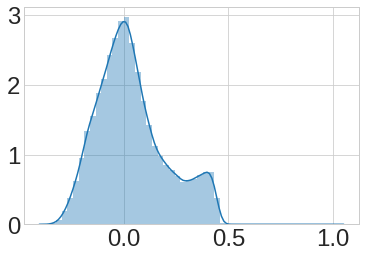

In [16]:
sns.distplot(xist_sims)
plt.show()

In [17]:
xist_sims.mean()

0.03590850696912462

Bit of a weird way of doing this, but whatever:

In [49]:
def get_ids(path):
    with open(path) as infile:
        return [line.strip() for line in infile]
    
id_paths = [
    'v26_lnc_unspliced_transcript_ids.txt',
    'v26_lnc_spliced001_transcript_ids.txt',
    'v26_pc_unspliced_transcript_ids.txt',
    'v26_pc_spliced001_transcript_ids.txt'
]
folder = '/home/jessime/Research/mrna_lncrna/'
v26_combo_ids = []
for id_path in id_paths:
    ids = get_ids(folder+id_path)
    v26_combo_ids += ids
    
print(len(v26_combo_ids))
print(v26_combo_ids[:10])
print(v26_combo_ids[-10:])

65679
['UNSPLICED2', 'UNSPLICED3', 'UNSPLICED4', 'UNSPLICED5', 'UNSPLICED6', 'UNSPLICED7', 'UNSPLICED8', 'UNSPLICED11', 'UNSPLICED12', 'UNSPLICED13']
['ENST00000331070.8', 'ENST00000405239.5', 'ENST00000382449.5', 'ENST00000382392.5', 'ENST00000382365.6', 'ENST00000382314.6', 'ENST00000382287.5', 'ENST00000302805.7_PAR_Y', 'ENST00000262640.11_PAR_Y', 'ENST00000369423.7_PAR_Y']


df2 is named "2" because my original one used the wrong name order. It used the ids sorted by chromsomal position. But v26_combo is split up by lnc_un, lnc_sp, pc_un, pc_sp. Gotta make sure to keep that straight.

In [51]:
xist_sims_df = pd.DataFrame(data=xist_sims,
                            index=v26_combo_ids,
                            columns=['kmer r-value'])
df2 = '/home/jessime/Research/proteins/new_eCLIP/transcript_coverage.tab'
df2 = pd.read_csv(df2, sep='\t', index_col=0)
df2 = df2[df2.columns[:1]]
df2 = df2.join(xist_sims_df)
df2.head()

transcript_name  kmer r-value
transcript_id                                   
UNSPLICED2          MIR1302-2HG-un      0.017164
ENST00000473358.1  MIR1302-2HG-001     -0.051119
UNSPLICED3              FAM138A-un      0.006730
ENST00000417324.1      FAM138A-001     -0.006984
ENST00000335137.3        OR4F5-001      0.097805

In [52]:
protein_df = '/home/jessime/Dropbox/Documents/dissertation/xist_like_protein_coverage.tab'
protein_df = (pd.read_csv(protein_df, sep='\t', index_col=0)
                  .drop('transcript_name', axis=1)
                  .rename(columns={'XIST-001':'protein r-value'}))
df2 = df2.join(protein_df).dropna()
df2.head(10)

transcript_name  kmer r-value  protein r-value
transcript_id                                                      
ENST00000335137.3          OR4F5-001      0.097805          0.19297
UNSPLICED4           RP11-34P13.7-un      0.319925          0.36993
ENST00000466430.5   RP11-34P13.7-001     -0.007463          0.42304
ENST00000495576.1   RP11-34P13.8-001     -0.036414          0.34274
UNSPLICED6          RP11-34P13.14-un     -0.006838          0.19297
ENST00000493797.1  RP11-34P13.14-001     -0.004524          0.19297
ENST00000466557.6  RP11-34P13.13-001     -0.078742         -0.11210
UNSPLICED11            AP006222.2-un      0.355833          0.35180
ENST00000424587.6     AP006222.2-001     -0.000384          0.13643
ENST00000432964.1  RP4-669L17.10-001     -0.036248          0.04378

In [54]:
df2.shape

(28991, 3)

In [60]:
df2_no_xist = df2[~df2['transcript_name'].str.contains('XIST')]
df2_no_xist.shape

(28989, 3)

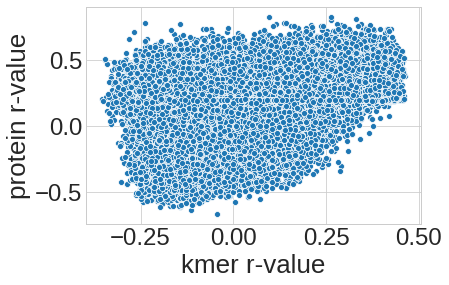

In [61]:
sns.scatterplot('kmer r-value', 'protein r-value', data=df2_no_xist)
plt.show()

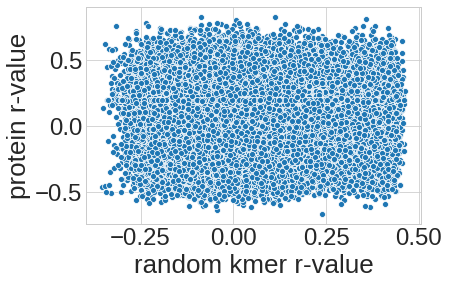

In [64]:
df_random = df2_no_xist.copy()
rand_kmer_rvals = df_random['kmer r-value'].values.copy()
np.random.shuffle(rand_kmer_rvals)
df_random['random kmer r-value'] = rand_kmer_rvals
sns.scatterplot('random kmer r-value', 'protein r-value', data=df_random)
plt.show()

In [65]:
pearsonr(df2_no_xist['kmer r-value'], df2_no_xist['protein r-value'])

(0.4199302875328777, 0.0)

In [84]:
sns.regplot('kmer r-value', 'protein r-value', data=df2_no_xist, scatter_kws={'alpha': .025, 'color':colors[1]})
outfile = '/home/jessime/Dropbox/Documents/dissertation/kmer_vs_protein_profile.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

Oh, right. That line is from all the transcripts that don't have any protein binding and likely aren't expressed. What if we drop those values?

In [73]:
df2_no_xist_p19 = df2_no_xist[df2_no_xist['protein r-value'] != 0.19297]
df2_no_xist_p19.shape

(24966, 3)

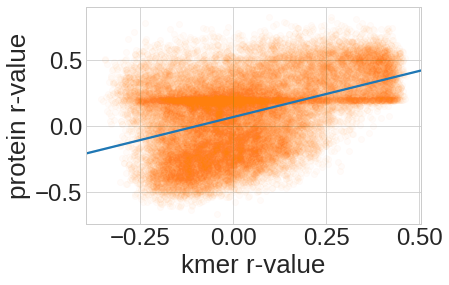

In [74]:
sns.regplot('kmer r-value', 'protein r-value', data=df2_no_xist_p19, 
            scatter_kws={'alpha': .025, 'color':colors[1]})
plt.show()

It's still there, since there are a lot that only bind a couple. Let's drop a few more.

In [77]:
df2_no_xist_p19ish = df2_no_xist[(df2_no_xist['protein r-value'] < 0.18) |
                                 (df2_no_xist['protein r-value'] > 0.2)]
df2_no_xist_p19ish.shape

(23381, 3)

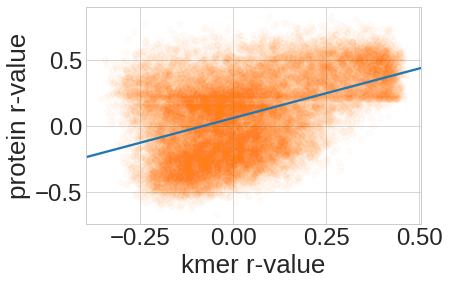

In [85]:
sns.regplot('kmer r-value', 'protein r-value', data=df2_no_xist_p19ish, 
            scatter_kws={'alpha': .025, 'color':colors[1]})
outfile = '/home/jessime/Dropbox/Documents/dissertation/kmer_vs_protein_profile_p19ish.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

In [80]:
pearsonr(df2_no_xist_p19ish['kmer r-value'], df2_no_xist_p19ish['protein r-value'])

(0.45754331976235246, 0.0)

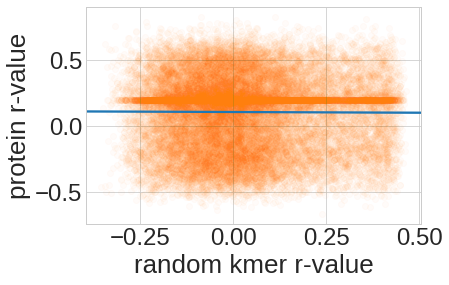

In [86]:
sns.regplot('random kmer r-value', 'protein r-value', data=df_random,
           scatter_kws={'alpha': .025, 'color':colors[1]})
outfile = '/home/jessime/Dropbox/Documents/dissertation/kmer_vs_protein_profile_random.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

In [83]:
pearsonr(df_random['random kmer r-value'], df_random['protein r-value'])

(-0.007052827018697908, 0.22983325095756899)

And now for the follow up: do the top protein profiles have a significantly higher set of seekr r-values? The previous data points towards yes.

In [87]:
infile = '/home/jessime/Dropbox/Documents/dissertation/xist_like_protein_coverage_99th.tab'
sim_k562_99th = pd.read_csv(infile, sep='\t', index_col=0)
sim_k562_99th.head()

transcript_name  XIST-001
transcript_id                             
UNSPLICED34362        MORF4L2-un   0.82412
UNSPLICED646            SRSF4-un   0.82281
UNSPLICED27996  RP11-159D12.5-un   0.80668
UNSPLICED27937         LUC7L3-un   0.79885
UNSPLICED10786      HIST1H2BJ-un   0.78108

In [92]:
df99th = df2.loc[sim_k562_99th.index]
df99th.shape

(289, 3)

In [96]:
not_df99th = df2.loc[[i for i in df2.index if i not in sim_k562_99th.index]]
not_df99th.shape

(28702, 3)

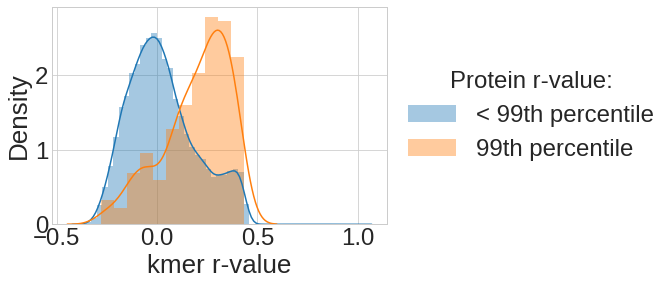

In [105]:
sns.distplot(not_df99th['kmer r-value'], label='< 99th percentile')
sns.distplot(df99th['kmer r-value'], label='99th percentile')
plt.legend(loc='center left', title='Protein r-value:', title_fontsize=24, bbox_to_anchor=(1, 0.5))
plt.ylabel('Density')
outfile = '/home/jessime/Dropbox/Documents/dissertation/kmer_distros_99th_protein.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

In [104]:
print(not_df99th['kmer r-value'].mean())
print(df99th['kmer r-value'].mean())
mannwhitneyu(not_df99th['kmer r-value'], df99th['kmer r-value'])

0.029643706215642062
0.19518396015723471


MannwhitneyuResult(statistic=2027585.0, pvalue=5.38862076187486e-51)

In [94]:
df99th['kmer r-value'].mean()

0.19518396015723471

In [95]:
df99th.sort_values('kmer r-value', ascending=False).head(15)

transcript_name  kmer r-value  protein r-value
transcript_id                                                  
UNSPLICED9250           ARL15-un      0.430935          0.64647
UNSPLICED8095           BMP2K-un      0.427531          0.64514
UNSPLICED18146           HBG2-un      0.426786          0.67568
UNSPLICED6961           MBNL1-un      0.426456          0.73651
UNSPLICED30153     AC005307.5-un      0.419893          0.71979
UNSPLICED13406          CPED1-un      0.416678          0.73645
UNSPLICED13399         LVCAT5-un      0.415614          0.71443
UNSPLICED4744            ZEB2-un      0.414789          0.73060
UNSPLICED5680      AC069277.2-un      0.412791          0.68617
UNSPLICED7720   RP11-734I18.1-un      0.412463          0.64121
UNSPLICED4839            TANK-un      0.410264          0.63922
UNSPLICED12321           VWDE-un      0.409951          0.70252
UNSPLICED8480         SLC7A11-un      0.407643          0.65603
UNSPLICED32340         SAMSN1-un      0.407456          0.66793
UNSPLICED4880      AC016723.4-un      0.404780          0.64473

In [110]:
outfile = '/home/jessime/Dropbox/Documents/dissertation/xist_like_kmer_protein_rvals.tab'
df2.to_csv(outfile, sep='\t', float_format='%.3f')
outfile = '/home/jessime/Dropbox/Documents/dissertation/xist_like_kmer_protein_rvals_99th.tab'
df99th_percentiles = df99th.sort_values('kmer r-value', ascending=False).copy()
percentiles = [percentileofscore(df2['kmer r-value'], r) for r in df99th_percentiles['kmer r-value']]
df99th_percentiles['kmer percentiles'] = percentiles
df99th_percentiles.to_csv(outfile, sep='\t', float_format='%.3f')

## Xist community

This is another thing I don't think is going to work (idk), but I can ask if there are more Xist-community transcripts than expected in this top set of transcripts.

In [115]:
v26_groups = '/home/jessime/Research/mrna_lncrna/v26_extend_groups2.csv'
v26_groups = pd.read_csv(v26_groups, index_col=0)
v26_groups = v26_groups.iloc[list(range(len(v26_combo_ids)))] # get rid of doped lncs
v26_groups['transcript_id'] = v26_combo_ids
v26_groups = v26_groups.set_index('transcript_id')
v26_groups = v26_groups[['group']]
print(v26_groups.shape)
v26_groups.head()

(65679, 1)


group
transcript_id       
UNSPLICED2         5
UNSPLICED3         5
UNSPLICED4         7
UNSPLICED5         5
UNSPLICED6         5

In [124]:
v26_groups['group'].value_counts()

0     8950
1     8075
2     7281
3     6786
4     6375
5     6166
6     6152
7     5871
8     5113
9     4164
10     746
Name: group, dtype: int64

In [117]:
df99th_groups = df99th_percentiles.join(v26_groups)
print(df99th_groups.shape)
df99th_groups.head()

(289, 5)


transcript_name  kmer r-value  protein r-value  \
transcript_id                                                   
UNSPLICED9250         ARL15-un      0.430935          0.64647   
UNSPLICED8095         BMP2K-un      0.427531          0.64514   
UNSPLICED18146         HBG2-un      0.426786          0.67568   
UNSPLICED6961         MBNL1-un      0.426456          0.73651   
UNSPLICED30153   AC005307.5-un      0.419893          0.71979   

                kmer percentiles  group  
transcript_id                            
UNSPLICED9250          99.234245      8  
UNSPLICED8095          99.058328      8  
UNSPLICED18146         99.020386      7  
UNSPLICED6961          98.996240      4  
UNSPLICED30153         98.606464      9

In [125]:
obs_group_counts = df99th_groups['group'].value_counts()
obs_group_counts

6    121
8     79
3     35
4     19
9     12
7     12
5      7
2      3
1      1
Name: group, dtype: int64

type	lnc_sp	lnc_un	pc_sp	pc_un	total
group					
0	1259	934	5622	1135	8950
1	1443	1308	3076	2248	8075
2	2697	1354	2881	349	7281
3	1147	1767	585	3287	6786
4	738	2256	1940	1441	6375
5	1753	1537	1031	1845	6166
6	490	1636	373	3653	6152
7	1052	2497	816	1506	5871
8	334	899	1118	2762	5113
9	903	1311	394	1556	4164
10	249	100	362	35	746
total	12065	15599	18198	19817	65679

In [123]:
obs6 = 121
obs6_out = 65679 - 121
exp6 = int(289 * (6152/65679)) # reference: "crosstabbed" from beginning of this notebook.
exp6_out = 65679 - exp6
print('obs:', obs6)
print('obs_out:', obs6_out)
print('exp6:', exp6)
print('exp6_out:', exp6_out)
chisquare([obs6, obs6_out], [exp6, exp6_out])

obs: 121
obs_out: 65558
exp6: 27
exp6_out: 65652


Power_divergenceResult(statistic=327.3938476952551, pvalue=3.551546726733613e-73)

In [133]:
df = pd.DataFrame(data=[obs_group_counts.get(i, 0) for i in range(11)], columns=['observed'])
full_group_counts = v26_groups['group'].value_counts()
total = 65679
df['expected'] = [int(289 * (i/total)) for i in full_group_counts]
df['observed_out'] = total - df['observed']
df['expected_out'] = total - df['expected']
p_values = []
for i, row in df.iterrows():
    p_values.append(chisquare([row['observed'], row['observed_out']],
                              [row['expected'], row['expected_out']])[1])
df['p-value'] = p_values
df

observed  expected  observed_out  expected_out       p-value
0          0        39         65679         65640  4.188050e-10
1          1        35         65678         65644  8.999562e-09
2          3        32         65676         65647  2.931889e-07
3         35        29         65644         65650  2.650999e-01
4         19        28         65660         65651  8.890491e-02
5          7        27         65672         65652  1.182176e-04
6        121        27         65558         65652  3.551547e-73
7         12        25         65667         65654  9.308938e-03
8         79        22         65600         65657  5.430845e-34
9         12        18         65667         65661  1.572423e-01
10         0         3         65679         65676  8.325747e-02

**Warning:** This table is incorrect, because of the size of the out groups. See April 2019 for a corrected table.

## Redraw

The scatter plots are annoying.

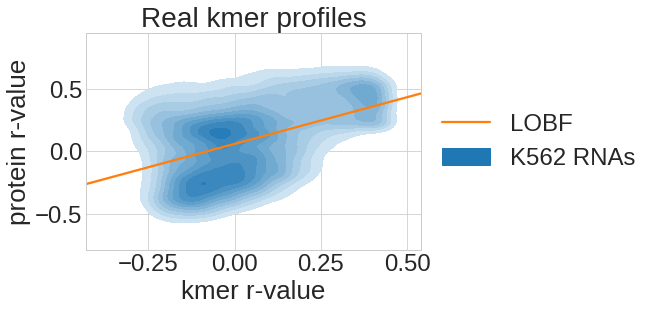

In [141]:
sns.kdeplot(df2_no_xist_p19ish['kmer r-value'], df2_no_xist_p19ish['protein r-value'], 
            shade=True, shade_lowest=False, label='K562 RNAs')
sns.regplot('kmer r-value', 'protein r-value', data=df2_no_xist_p19ish, 
            scatter=False, label='LOBF')
plt.title('Real kmer profiles')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
outfile = '/home/jessime/Dropbox/Documents/dissertation/kmer_vs_protein_profile_p19ish2.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

I don't want to have to explain the 0.19

In [143]:
df2_random_p19ish = df_random[(df_random['protein r-value'] < 0.18) |
                                 (df_random['protein r-value'] > 0.2)]

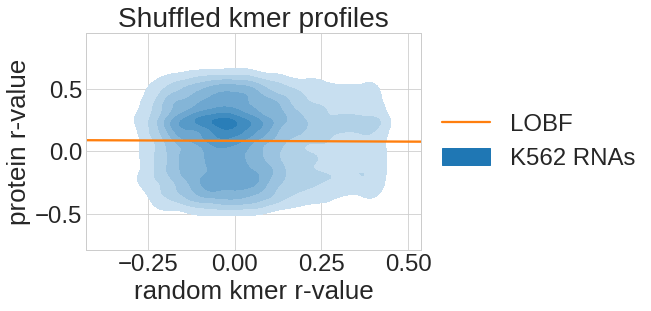

In [144]:
sns.kdeplot(df2_random_p19ish['random kmer r-value'], df2_random_p19ish['protein r-value'], 
            shade=True, shade_lowest=False, label='K562 RNAs')
sns.regplot('random kmer r-value', 'protein r-value', data=df2_random_p19ish, 
            scatter=False, label='LOBF')
plt.title('Shuffled kmer profiles')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
outfile = '/home/jessime/Dropbox/Documents/dissertation/kmer_vs_protein_profile_random2.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()